In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import metrics
import scipy.stats as stats

In [109]:
df= pd.read_csv('kc_house_data.csv')

In [110]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [111]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [113]:
df.shape

(21613, 21)

In [114]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [115]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Dropping columns that aren't logically needed

In [116]:
df.drop(['id'], axis= 1, inplace = True)
df.drop(['date'], axis= 1, inplace = True)
df.drop(['zipcode'], axis= 1, inplace = True)

In [117]:
df.bathrooms = df.bathrooms.astype(int)
df.floors= df.floors.astype(int)

In [118]:
df['lat'] = df['lat'].apply(np.ceil)
df['long'] = df['long'].apply(np.ceil)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  int32  
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  int32  
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [120]:
corr= df.corr()[['price']].sort_values(by='price')

### A heatmap made specifically to compare all variables in dataset with the target variable "Price"

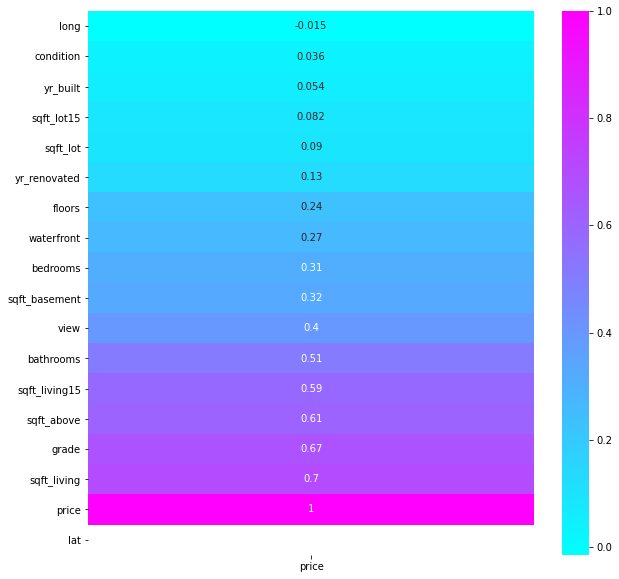

In [121]:
sns.heatmap(corr,annot= True, cmap= 'cool')
fig = plt.gcf()
fig.set_size_inches(10, 10)

### Dropping columns with very low correlation

In [122]:
df.drop(['condition'], axis= 1, inplace = True)
df.drop(['yr_built'], axis= 1, inplace = True)
df.drop(['sqft_lot15'], axis= 1, inplace = True)
df.drop(['sqft_lot'], axis= 1, inplace = True)
df.drop(['lat','long'], axis= 1, inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15
0,221900.0,3,1,1180,1,0,0,7,1180,0,0,1340
1,538000.0,3,2,2570,2,0,0,7,2170,400,1991,1690
2,180000.0,2,1,770,1,0,0,6,770,0,0,2720
3,604000.0,4,3,1960,1,0,0,7,1050,910,0,1360
4,510000.0,3,2,1680,1,0,0,8,1680,0,0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,3,0,0,8,1530,0,0,1530
21609,400000.0,4,2,2310,2,0,0,8,2310,0,0,1830
21610,402101.0,2,0,1020,2,0,0,7,1020,0,0,1020
21611,400000.0,3,2,1600,2,0,0,8,1600,0,0,1410


### Visualizing correlations after dropping very low ones

<AxesSubplot:>

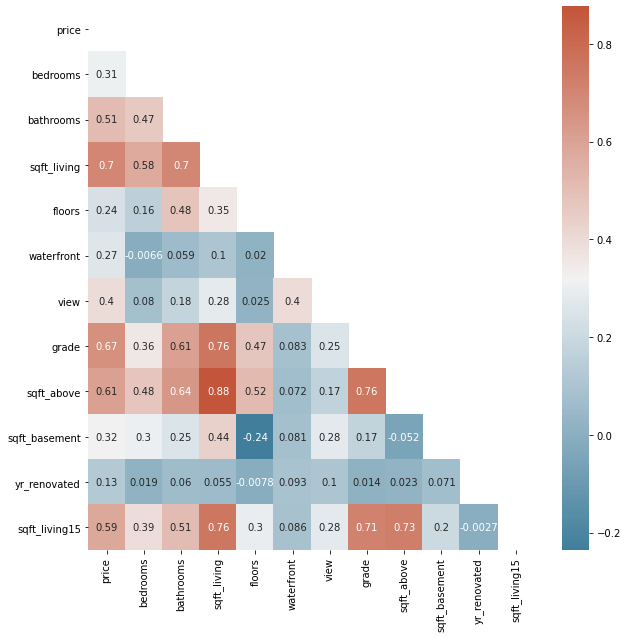

In [123]:
corr = df.corr()
plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)

# The most important features are the features that have moderate to high correlations, starting from 0.4 to 0.9(which vary from beige to brown color in heatmap above) and they are columns 'view', 'bathrooms', 'sqft_living', 'sqft_above', 'grade', 'sqft_living15' 

### Some visualizations to see values distribution among dataset

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

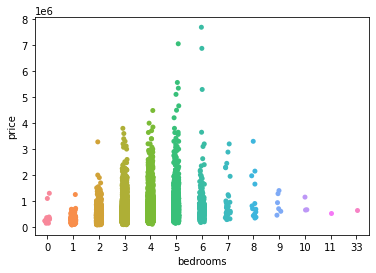

In [124]:
sns.stripplot(x='bedrooms', y='price',data=df)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

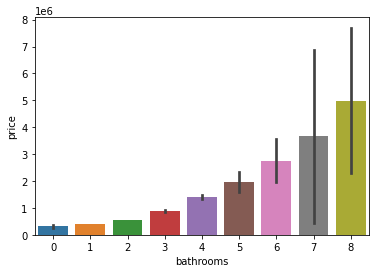

In [125]:
sns.barplot(x='bathrooms', y='price',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'View vs Price')

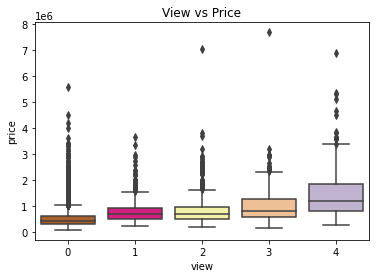

In [126]:
sns.boxplot(df['view'], df['price'], palette= 'Accent_r')
plt.title("View vs Price")

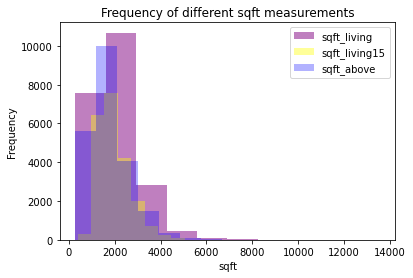

In [127]:
plt.hist(df['sqft_living'],label='sqft_living', alpha= 0.5, color='purple')

plt.hist(df['sqft_living15'], label='sqft_living15', alpha= 0.4, color='yellow')

plt.hist(df['sqft_above'], label='sqft_above', alpha= 0.3, color= 'blue') 
plt.xlabel('sqft')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Frequency of different sqft measurements')
plt.show()

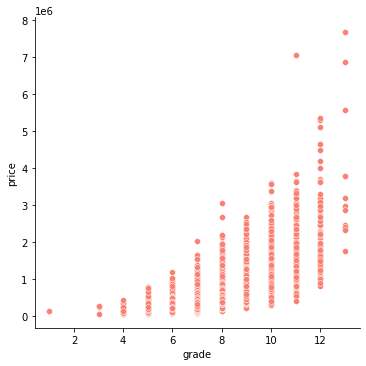

In [128]:
sns.relplot(x='grade',y='price',data=df, color= 'salmon')

### Choosing the feature with the highest correlation "sqft_living" with the target variable "price" and applying data splitting with data of 80% training and 20% testing for our model to perform linear regression algorithm

In [129]:
x= df.iloc[:,3:4]
y=df.iloc[:,0:1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 10)

In [130]:
model1=LinearRegression()  
model1.fit(x_train,y_train) 
linearpredicted=model1.predict(x_test) 

### Showing the coefficient and intercept of the model

In [131]:
model1.coef_

array([[277.36412987]])

In [132]:
model1.intercept_

array([-36738.17734638])

In [133]:
print("MSE", mean_squared_error(y_test,linearpredicted))
out1= metrics.r2_score(y_test,linearpredicted)
print("R squared", out1)

MSE 71973967322.16974
R squared 0.5073460545260231


### Visualizing linear regression through a scatterplot

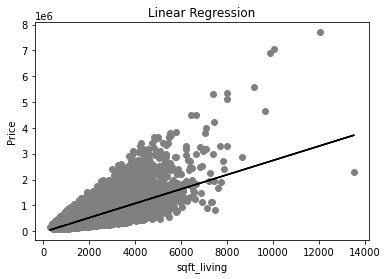

In [134]:
plt.scatter(x,y,color="gray")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x,model1.predict(x),color="k")
plt.show()

### Since regression is sensitive to outliers, I made up another dataframe that copies the same data from 'df' to remove outliers and test our model's accuracy again without outliers

In [135]:
df_trial=df

### I removed the outliers using the interquartile range's method

In [136]:
Q1 = df_trial.quantile(q=.25)
Q3 = df_trial.quantile(q=.75)
IQR = df_trial.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df_trial = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df_trial.shape

(16599, 12)

### Visualizing the data without outliers

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

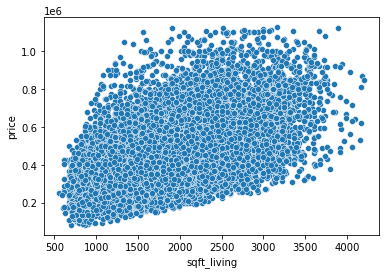

In [137]:
sns.scatterplot(x='sqft_living', y= 'price', palette="BuPu", data= df_trial)

In [138]:
x= df_trial.iloc[:,3:4]
y=df_trial.iloc[:,0:1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2,random_state= 0)

In [139]:
model2=LinearRegression()  
model2.fit(x_train,y_train) 
outpredict=model2.predict(x_test) 

### Showing the coefficient and intercept of the model

In [140]:
model2.coef_

array([[150.67569213]])

In [141]:
model2.intercept_

array([162820.99072966])

### After fitting and training model, we gave it the testing dataset to try and predict correctly, as well as checking mean squared error(the less the better) and R squared (accuracy/the higher the better)

In [142]:
print("MSE", mean_squared_error(y_test,outpredict))
print("R squared", metrics.r2_score(y_test,outpredict))

MSE 23303587834.69577
R squared 0.28553811374746874


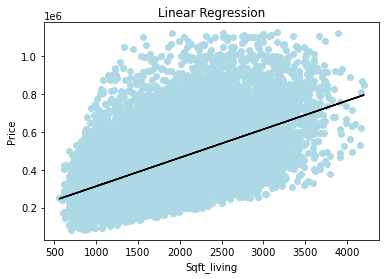

In [143]:
plt.scatter(x,y,color="lightblue")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Sqft_living")
plt.plot(x,model2.predict(x),color="k")
plt.show()

### After performing linear regression again after removing outlier, it's obvious that accuracy is much less and thus, no need to remove outliers from dataset and use again the 'df' dataframe

In [144]:
x= df[['sqft_living', 'sqft_above','grade','sqft_living15']]
y=df.iloc[:,0:1]

### Performing multi-linear regression and choosing the columns with highest correlations and testing its accuracy, along with splitting data to 80% training and 20% testing, and lastly checking mean squared error(the less the better) and R squared (accuracy/the higher the better)

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 5)

In [146]:
model3=LinearRegression()  
model3.fit(x_train,y_train) 
multi=model3.predict(x_test) 

### Showing the coefficient and intercept of the model

In [147]:
model3.coef_

array([[ 2.31177189e+02, -8.34468472e+01,  1.05172120e+05,
         2.43378491e+01]])

In [148]:
model3.intercept_

array([-645306.20626411])

In [149]:
print("MSE", mean_squared_error(y_test,multi))
out2=metrics.r2_score(y_test,multi)
print("R squared", out2)

MSE 61138884370.691505
R squared 0.5518714161723518


### Performing polynomial regression 2nd degree and choosing the columns with highest correlations and testing its accuracy, along with splitting data to 80% training and 20% testing, and lastly checking mean squared error(the less the better) and R squared (accuracy/the higher the better)

In [150]:
x= df[['sqft_living', 'sqft_above','grade']]
y=df.iloc[:,0:1]

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 10)

In [152]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

In [153]:
x_fit = poly.fit_transform(x_train) 
lg.fit(x_fit, y_train)
x_test_ = poly.fit_transform(x_test)
polypredicted = lg.predict(x_test_)

### Showing the coefficient and intercept of the model

In [154]:
lg.coef_

array([[ 0.00000000e+00, -4.31077213e+02,  1.94367596e+02,
        -7.60465329e+04, -8.68707491e-02,  1.73948529e-01,
         9.18566428e+01, -8.66257631e-02, -4.81644084e+01,
         5.20506820e+03]])

In [155]:
lg.intercept_

array([537151.71851049])

In [156]:
print("MSE: ", metrics.mean_squared_error(y_test, polypredicted))
out3=metrics.r2_score(y_test,polypredicted)
print("R squared: ",out3 )

MSE:  54372851077.74713
R squared:  0.6278237728619684


In [157]:
print('Polynomial regression had the highest accuracy which was approximately '+ str(round(out3,2)) + ', followed by multi-linear regression with ' + str(round(out2,2)) + ', and lastly linear regression with ' + str(round(out1,2)))

Polynomial regression had the highest accuracy which was approximately 0.63, followed by multi-linear regression with 0.55, and lastly linear regression with 0.51
